# Money transaction in Austrialia - part1
### Exploratory Data Analysis
This sythestic data is made by InsideSherpa.com for data analysis online intership projects. 

## 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = r'PATH'
df = pd.read_excel(url)
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long,latitude,ABS(latitude),txn_description,merchant_id,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,Unnamed: 24,movement,Month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41,-27.95,27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38,-27.99,debit,8.0
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41,-27.95,27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21,-33.87,debit,8.0
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23,-33.94,33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21,-33.87,debit,8.0
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10,-27.66,27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05,-26.68,debit,8.0
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41,-27.95,27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44,-28.06,debit,8.0


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long', 'latitude', 'ABS(latitude)', 'txn_description',
       'merchant_id', 'merchant_code', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'Unnamed: 24', 'movement', 'Month'],
      dtype='object')

## 2. Data Visualization
### 2.1 Monthly transaction frequency

In [4]:
customer = df[['customer_id','amount','date','age','gender']].copy()
customer['Month'] = df['date'].dt.month
customer = customer.dropna()

In [5]:
monthly_data = customer.groupby(['customer_id','gender','age','Month'])['amount'].sum().reset_index()
monthly_data.head()

,customer_id,gender,age,Month,amount
0,CUS-1005756958,F,53.0,8.0,6139.40
1,CUS-1005756958,F,53.0,9.0,4663.22
2,CUS-1005756958,F,53.0,10.0,5466.35
3,CUS-1117979751,M,21.0,8.0,8703.30
4,CUS-1117979751,M,21.0,9.0,13257.61


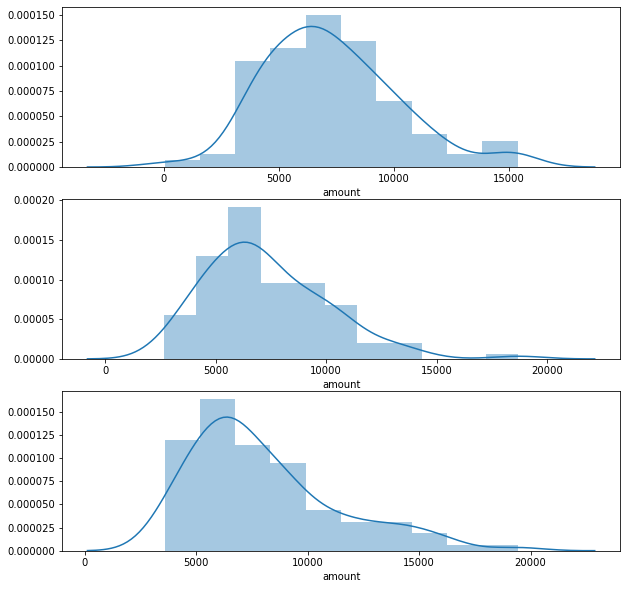

In [6]:
plt.figure(figsize = (10,10))

plt.subplot(3, 1, 1)
dist_0 = monthly_data.loc[monthly_data['Month'] == 8]
sns.distplot(dist_0['amount'])

plt.subplot(3, 1, 2)
dist_1 = monthly_data.loc[monthly_data['Month'] == 9]
sns.distplot(dist_1['amount'])

plt.subplot(3, 1, 3)
dist_2 = monthly_data.loc[monthly_data['Month'] == 10]
sns.distplot(dist_2['amount'])

plt.show()

### 2.2 Monthly money transaction by different ages

In [7]:
age_cate = monthly_data.groupby(['age','Month'])['amount'].sum().reset_index()
age_cate['age'] = age_cate['age'].astype(int)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:1627: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


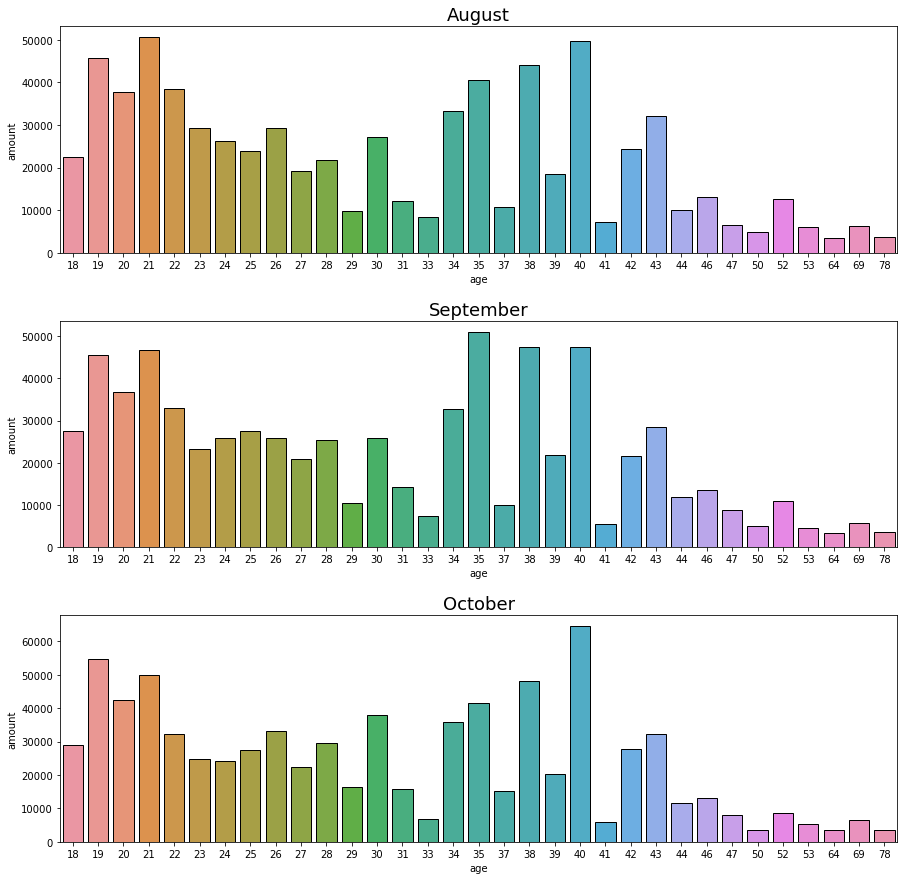

In [9]:
plt.figure(figsize = (15,15))

plt.subplot(3, 1, 1)
bar_1 = age_cate.loc[age_cate['Month'] == 8]
sns.barplot(x="age", y="amount", data=bar_1, dodge=False, edgecolor="k"*len(bar_1))
plt.title('August',fontsize = 18)

plt.subplot(3, 1, 2)
bar_2 = age_cate.loc[age_cate['Month'] == 9]
sns.barplot(x="age", y="amount", data=bar_2, dodge=False, edgecolor="k"*len(bar_2))
plt.title('September',fontsize = 18)

plt.subplot(3, 1, 3)
bar_3 = age_cate.loc[age_cate['Month'] == 10]
sns.barplot(x="age", y="amount", data=bar_3, dodge=False, edgecolor="k"*len(bar_3))
plt.title('October',fontsize = 18)

plt.subplots_adjust(wspace= 0.2, hspace = 0.3)
plt.show()

### 2.2 Monthly money transaction by gender and months

In [10]:
gender_cate = monthly_data.groupby(['gender','Month'])['amount'].sum().reset_index()

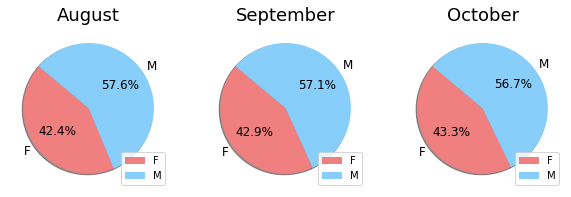

In [11]:
plt.figure(figsize = (10,3))
colors = ['lightcoral', 'lightskyblue']

plt.subplot(1, 3, 1)
pie_1 = gender_cate.loc[gender_cate['Month'] == 8]
plt.pie(pie_1['amount'], labels = pie_1['gender'], colors = colors, 
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('August',fontsize = 18)
plt.legend(loc = 'lower right')

plt.subplot(1, 3, 2)
pie_2 = gender_cate.loc[gender_cate['Month'] == 9]
plt.pie(pie_2['amount'], labels = pie_2['gender'], colors = colors, 
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('September',fontsize = 18)
plt.legend(loc = 'lower right')

plt.subplot(1, 3, 3)
pie_3 = gender_cate.loc[gender_cate['Month'] == 10]
plt.pie(pie_3['amount'], labels = pie_3['gender'], colors = colors, 
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('October',fontsize = 18)
plt.legend(loc = 'lower right')

plt.show()

### 2.3 Explore the weekly money transaction

In [12]:
customer['extraction'] = pd.to_datetime(df['extraction'])
customer.insert(loc=len(customer.columns), column='time', value=customer['extraction'].dt.strftime('%H:%M:%S')) 

In [13]:
customer['weekday'] = customer['date'].dt.dayofweek

In [14]:
weekly_cate = customer.groupby(['weekday','Month','age','gender'])['amount'].sum().reset_index()

In [15]:
dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
weekly_Aug = weekly_cate.copy().loc[weekly_cate['Month'] == 8]
weekly_Aug['weekday'] = weekly_Aug['weekday'].map(dict) 

weekly_Sep = weekly_cate.copy().loc[weekly_cate['Month'] == 9]
weekly_Sep['weekday'] = weekly_Sep['weekday'].map(dict)

weekly_Oct = weekly_cate.copy().loc[weekly_cate['Month'] == 10]
weekly_Oct['weekday'] = weekly_Oct['weekday'].map(dict)

In [16]:
week_8 = weekly_Aug.groupby('weekday')['amount'].sum().reset_index()
week_9 = weekly_Sep.groupby('weekday')['amount'].sum().reset_index()
week_10 = weekly_Oct.groupby('weekday')['amount'].sum().reset_index()

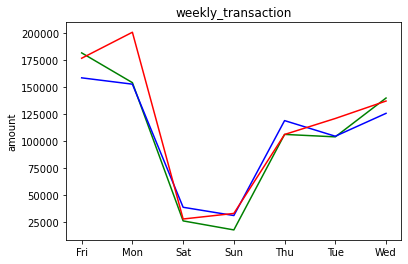

In [17]:
plt.plot(week_8.weekday,week_8.amount,color = 'g')
plt.plot(week_9.weekday,week_9.amount,color = 'b')
plt.plot(week_10.weekday,week_10.amount,color = 'r')
plt.title('weekly_transaction')
plt.ylabel('amount')

plt.show()

In [18]:
age_8 = weekly_Aug.groupby(['weekday','age'])['amount'].sum().reset_index()
age_9 = weekly_Sep.groupby(['weekday','age'])['amount'].sum().reset_index()
age_10 = weekly_Oct.groupby(['weekday','age'])['amount'].sum().reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:1646: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  label=hue_level, **kws)


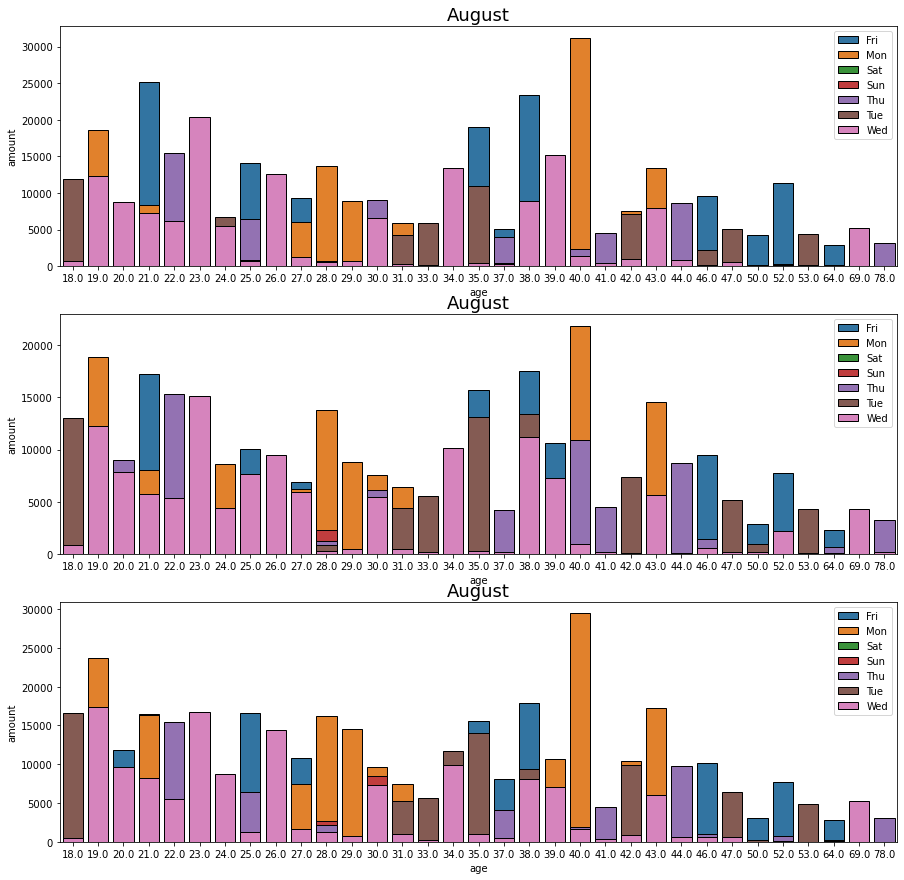

In [19]:
plt.figure(figsize = (15,15))

plt.subplot(3, 1, 1)
sns.barplot(x="age", y="amount", hue = 'weekday', data=age_8, dodge=False, edgecolor="k"*len(age_8))
plt.title('August',fontsize = 18)
plt.legend(loc = 'upper right')

plt.subplot(3, 1, 2)
sns.barplot(x="age", y="amount", hue = 'weekday', data=age_9, dodge=False, edgecolor="k"*len(age_9))
plt.title('August',fontsize = 18)
plt.legend(loc = 'upper right')

plt.subplot(3, 1, 3)
sns.barplot(x="age", y="amount", hue = 'weekday', data=age_10, dodge=False, edgecolor="k"*len(age_10))
plt.title('August',fontsize = 18)
plt.legend(loc = 'upper right')

plt.show()

In [20]:
gender_8 = weekly_Aug.groupby(['weekday','gender'])['amount'].sum().reset_index()
gender_9 = weekly_Sep.groupby(['weekday','gender'])['amount'].sum().reset_index()
gender_10 = weekly_Oct.groupby(['weekday','gender'])['amount'].sum().reset_index()

In [21]:
gender_8_F = gender_8.loc[gender_8['gender'] == 'F']
gender_8_M = gender_8.loc[gender_8['gender'] == 'M']

gender_9_F = gender_9.loc[gender_9['gender'] == 'F']
gender_9_M = gender_9.loc[gender_9['gender'] == 'M']

gender_10_F = gender_10.loc[gender_10['gender'] == 'F']
gender_10_M = gender_10.loc[gender_10['gender'] == 'M']

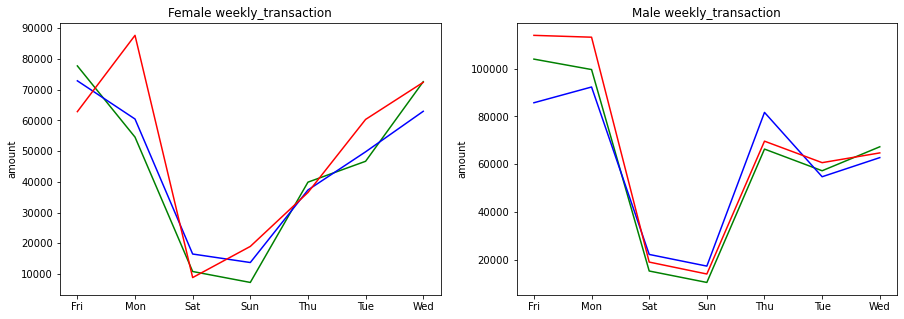

In [22]:
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.plot(gender_8_F.weekday,gender_8_F.amount,color = 'g')
plt.plot(gender_9_F.weekday,gender_9_F.amount,color = 'b')
plt.plot(gender_10_F.weekday,gender_10_F.amount,color = 'r')
plt.title('Female weekly_transaction')
plt.ylabel('amount')

plt.subplot(1, 2, 2)
plt.plot(gender_8_M.weekday,gender_8_M.amount,color = 'g')
plt.plot(gender_9_M.weekday,gender_9_M.amount,color = 'b')
plt.plot(gender_10_M.weekday,gender_10_M.amount,color = 'r')
plt.title('Male weekly_transaction')
plt.ylabel('amount')

plt.show()

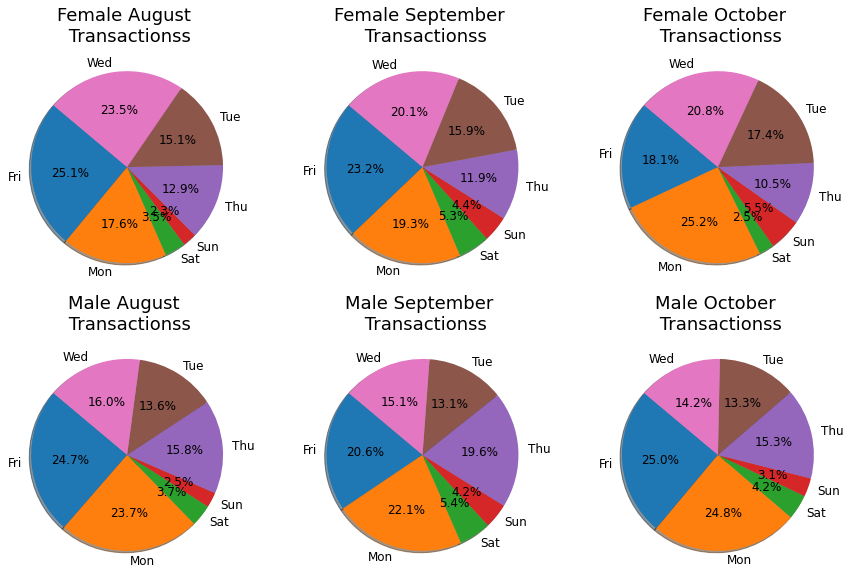

In [23]:
plt.figure(figsize = (15,15))

plt.subplot(3, 3, 1)
plt.pie(gender_8_F['amount'], labels = gender_8_F['weekday'],  
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Female August \n Transactionss',fontsize = 18)

plt.subplot(3, 3, 2)
plt.pie(gender_9_F['amount'], labels = gender_9_F['weekday'],  
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Female September \n Transactionss',fontsize = 18)

plt.subplot(3, 3, 3)
plt.pie(gender_10_F['amount'], labels = gender_10_F['weekday'],  
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Female October \n Transactionss',fontsize = 18)

plt.subplot(3, 3, 4)
plt.pie(gender_8_M['amount'], labels = gender_8_M['weekday'],  
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Male August \n Transactionss',fontsize = 18)

plt.subplot(3, 3, 5)
plt.pie(gender_9_M['amount'], labels = gender_9_M['weekday'],  
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Male September \n Transactionss',fontsize = 18)

plt.subplot(3, 3, 6)
plt.pie(gender_10_M['amount'], labels = gender_10_M['weekday'],  
        textprops={'fontsize': 12},autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Male October \n Transactionss',fontsize = 18)

plt.show()